In [1]:
import pandas as pd

data = pd.read_csv('data/dataset_reduced.csv')
data

,O,N,Specific surface area,Pore volume,Dap,ID/IG,Current density,Specific capacity,micro%
0,7.15,3.52,1546.1,0.5753,1.488390,1.029,0.10,85.0,0.939857
1,8.12,3.79,1315.2,0.5116,1.555961,1.038,0.10,114.0,0.931392
2,21.55,3.29,1140.8,0.8600,3.015428,0.820,0.10,90.2,0.209302
3,21.55,3.29,1140.8,0.8600,3.015428,0.820,0.25,86.3,0.209302
4,21.55,3.29,1140.8,0.8600,3.015428,0.820,0.50,79.9,0.209302
...,...,...,...,...,...,...,...,...,...
627,18.75,2.74,3518.0,1.5700,1.785105,1.102,1.00,132.0,0.777070
628,18.75,2.74,3518.0,1.5700,1.785105,1.102,2.00,116.5,0.777070
629,18.75,2.74,3518.0,1.5700,1.785105,1.102,5.00,108.8,0.777070
630,18.75,2.74,3518.0,1.5700,1.785105,1.102,10.00,98.9,0.777070


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['target_class'] = pd.qcut(data['Specific capacity'], q=10, labels=False)
X = data.drop(['Specific capacity', 'target_class'], axis=1)
y = data['Specific capacity']
stratify_column = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled, X_test_scaled, y_train, y_test

(            O         N  Specific surface area  Pore volume       Dap  \
 0    1.526124 -0.131350               1.510823     0.656866 -0.569079   
 1   -0.297092 -1.055675              -1.096975    -1.380955 -1.013188   
 2    1.526124 -0.131350               1.510823     0.656866 -0.569079   
 3   -0.148258 -0.202180               0.809291     1.271787  0.277967   
 4   -0.952892 -0.439458              -0.133456     1.629300  1.884198   
 ..        ...       ...                    ...          ...       ...   
 500 -0.148258 -0.202180               0.809291     1.271787  0.277967   
 501 -0.597086 -0.081769              -0.541288     2.515931  4.299486   
 502 -1.306373 -1.055675               1.637461     3.070790  0.796522   
 503 -0.520343 -0.290716               0.644215     0.070546 -0.545793   
 504  0.151735  0.162592              -0.181253    -0.518635 -0.539042   
 
         ID/IG  Current density    micro%  
 0   -0.338649        -0.262134  0.475445  
 1   -0.415250        

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):
    """
    Calculate and return actual vs pred fig for data_dopants metrics.
    """
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    rmse = root_mean_squared_error(y_true, y_pred)
    return r2, mae, mape, rmse


def metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, model_name):
    R2_train, MAE_train, MAPE_train, RMSE_train = calculate_metrics(y_train, y_train_pred)
    R2_test, MAE_test, MAPE_test, RMSE_test = calculate_metrics(y_test, y_test_pred)
    metrics = {'model': model_name,
                   'R2_train': R2_train, 'MAE_train': MAE_train, 'MAPE_train': MAPE_train, 'RMSE_train': RMSE_train,
                   'R2_test': R2_test, 'MAE_test': MAE_test, 'MAPE_test': MAPE_test, 'RMSE_test': RMSE_test}
    model_name_df = pd.DataFrame([metrics])
    return model_name_df

def plot_actual_vs_predicted(y_train, y_pred_train, y_test, y_pred_test, figpath=None):
    """
    Plot the actual vs predicted values for both training and test sets,
    and plot y=x as the fit line.
    """
    # 设置全局字体为Times New Roman，字号为32，字体粗细为粗体
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 32,
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })

    # 绘制训练集和测试集的散点图
    plt.scatter(y_train, y_pred_train, color='blue', label='Train', s=50, alpha=0.5)
    plt.scatter(y_test, y_pred_test, color='red', label='Test', s=50, alpha=0.5)

    # 计算合并数据的最小值和最大值，用于设置坐标轴范围和绘制y=x线
    y_pred_train = y_pred_train.ravel()
    y_pred_test = y_pred_test.ravel()
    y_combined = np.concatenate([y_train, y_pred_train, y_test, y_pred_test])
    min_val, max_val = np.min(y_combined), np.max(y_combined)
    padding = (max_val - min_val) * 0.05
    padded_min, padded_max = min_val - padding, max_val + padding

    # 绘制y=x的虚线，线宽为3
    plt.plot([padded_min, padded_max], [padded_min, padded_max], 'k--', lw=3, label='Regression Line')

    # 设置标题和轴标签，明确指定加粗
    plt.title('Actual vs Predicted Values', fontweight='bold')
    plt.xlabel('Actual Values', fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')

    # 设置图例，无边框，位于左上角
    plt.legend(frameon=False, loc='upper left', fontsize=28)

    # 设置坐标轴为相同比例，并且坐标轴范围一致
    plt.axis('equal')
    plt.xlim([padded_min, padded_max])
    plt.ylim([padded_min, padded_max])

    # 设置刻度线的长度和粗细
    plt.tick_params(axis='both', which='major', length=10, width=2, labelsize=32)

    # 检查并统一X轴和Y轴的刻度
    # 可以通过设置两个轴的相同刻度，或者根据数据自动选择刻度
    x_ticks = np.arange(0, max(y_combined) + 1, 50)  # 可以根据数据范围调整
    y_ticks = np.arange(0, max(y_combined) + 1, 50)  # 使得X和Y轴的刻度间隔相同

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # 设置图形边界的宽度和可见性
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)

    # 保存图像，背景透明，紧凑布局
    plt.savefig(figpath, bbox_inches='tight', transparent=True)
    plt.show()

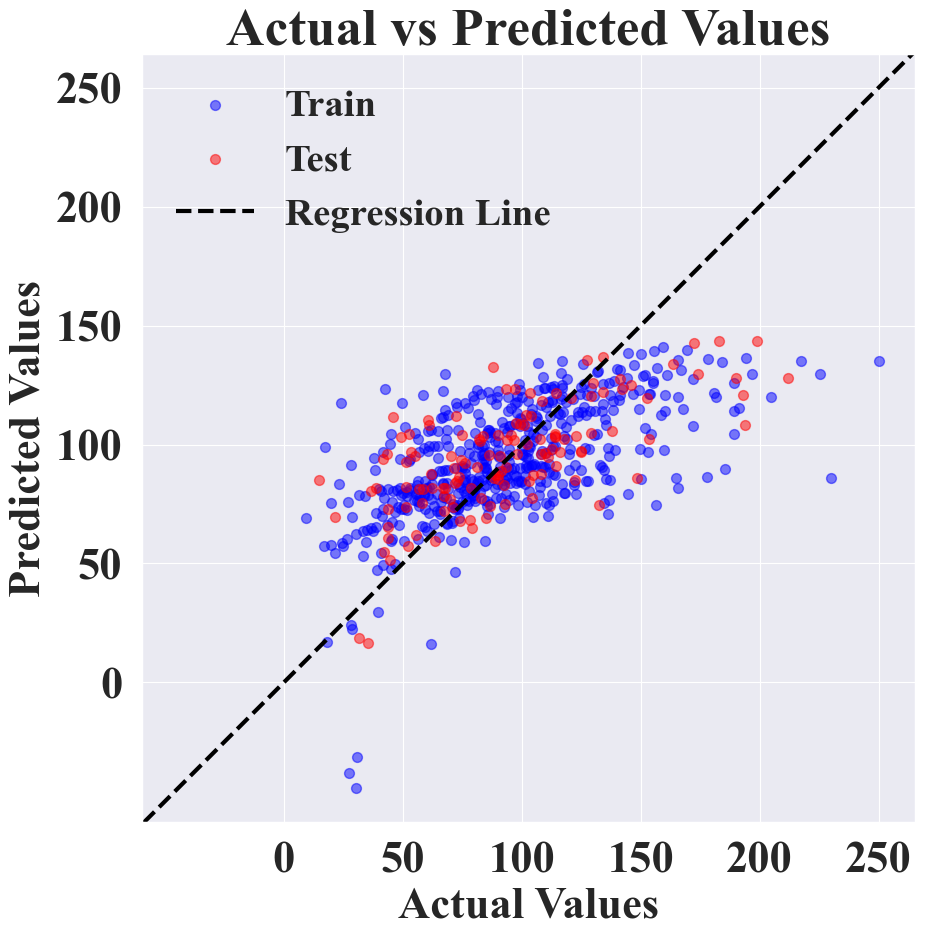

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.368366,23.53142,34.331034,31.197682,0.45277,22.477543,32.641922,29.215163


In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/lr_reduced.png')

lr_metrics

[LibSVM]

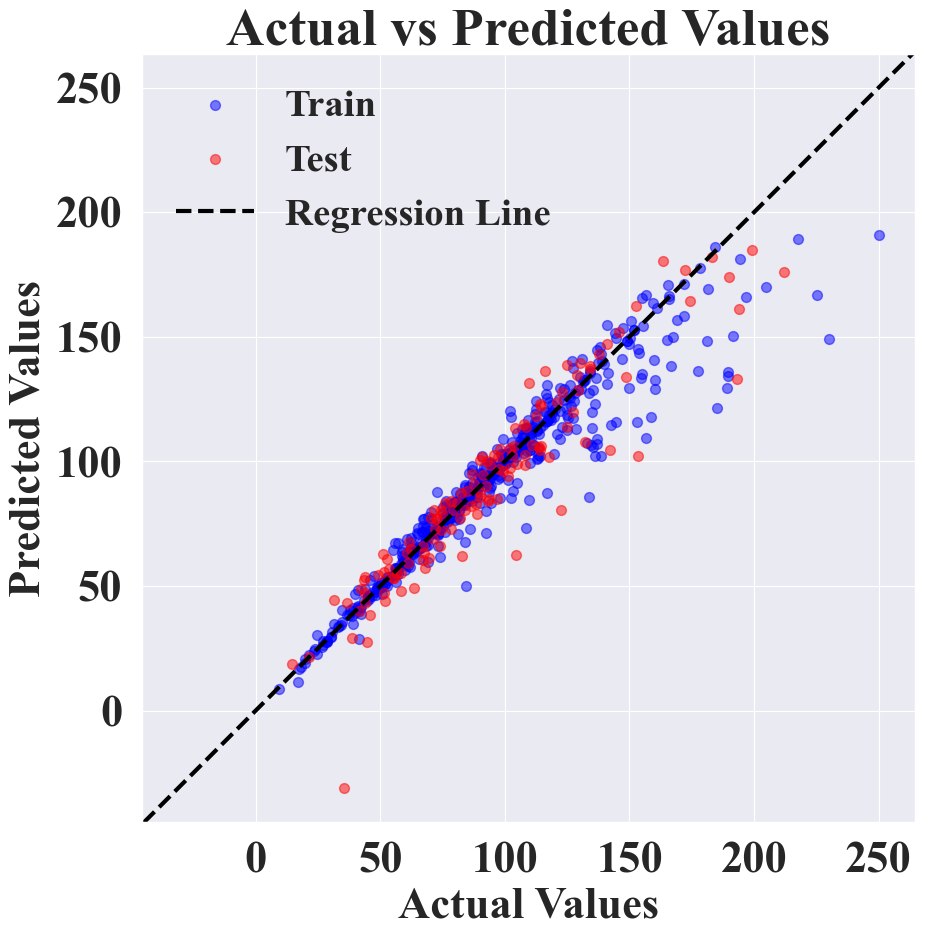

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,SVR,0.90725,6.086613,5.642222,11.954914,0.868283,9.288821,11.029474,14.333248


In [5]:
from sklearn.svm import SVR

svr = SVR(C=5, kernel='poly', degree=6, gamma='scale', coef0=6, epsilon=0.75, verbose=True)
svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'SVR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/svr_reduced.png')

svr_metrics

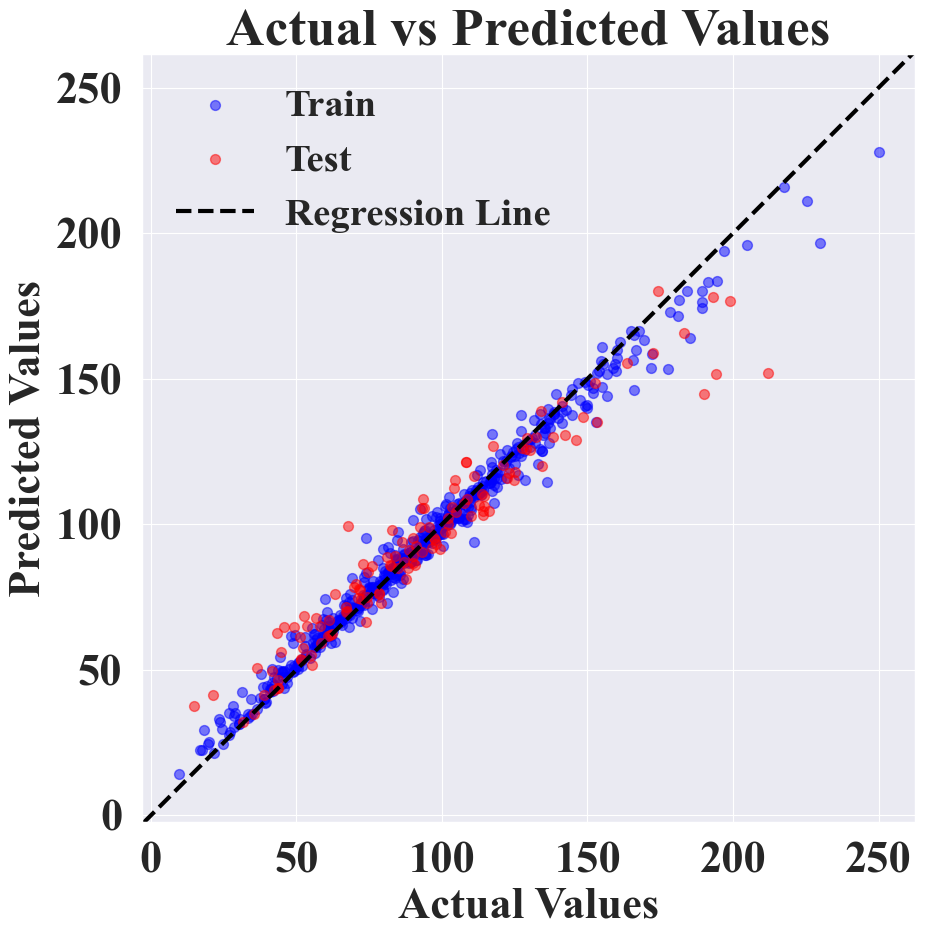

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest,0.980705,3.625796,4.760953,5.452702,0.911245,7.856233,10.296883,11.765769


In [6]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=80,
                            max_depth=13,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=21)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/rfr_reduced.png')

rfr_metrics

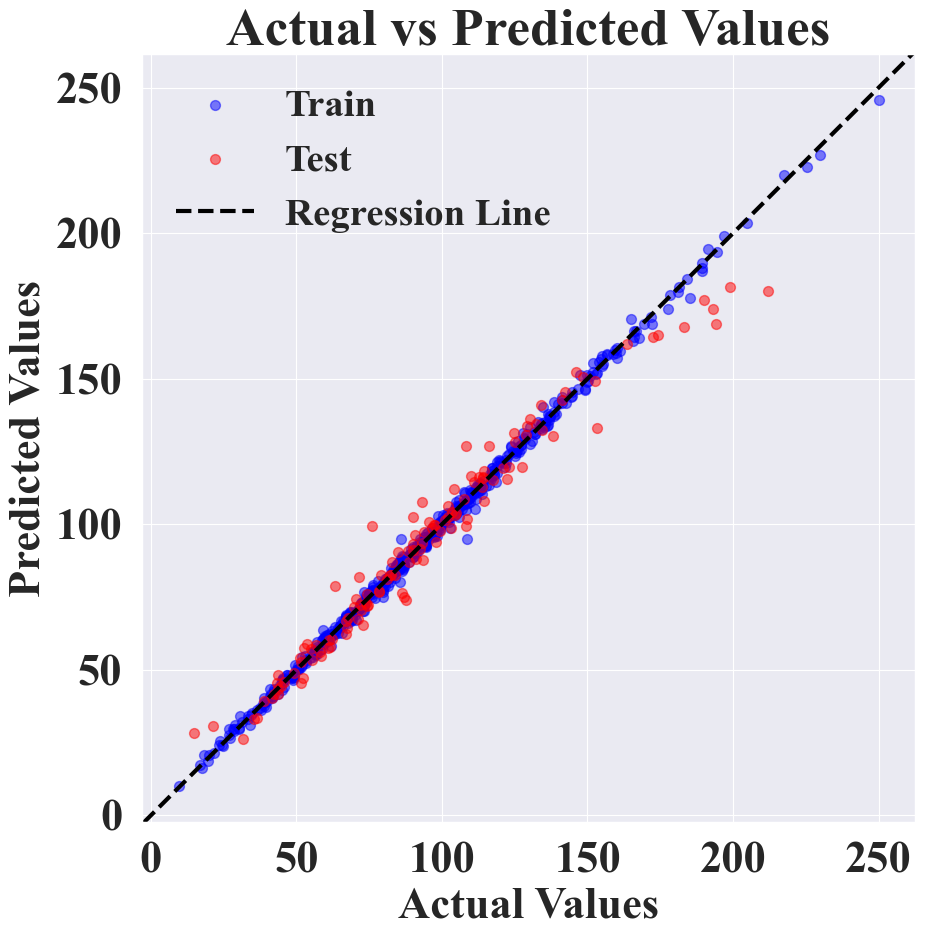

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,GBR,0.997963,1.265646,1.58338,1.771753,0.964033,5.009957,6.06153,7.489926


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=80,
                                alpha=0.01,
                                learning_rate=0.25,
                                max_depth=9,
                                max_features=0.3,
                                min_samples_leaf=3,
                                min_samples_split=7,
                                subsample=0.7,
                                random_state=21)
gbr.fit(X_train_scaled, y_train)

y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'GBR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/gbr_reduced.png')

gbr_metrics

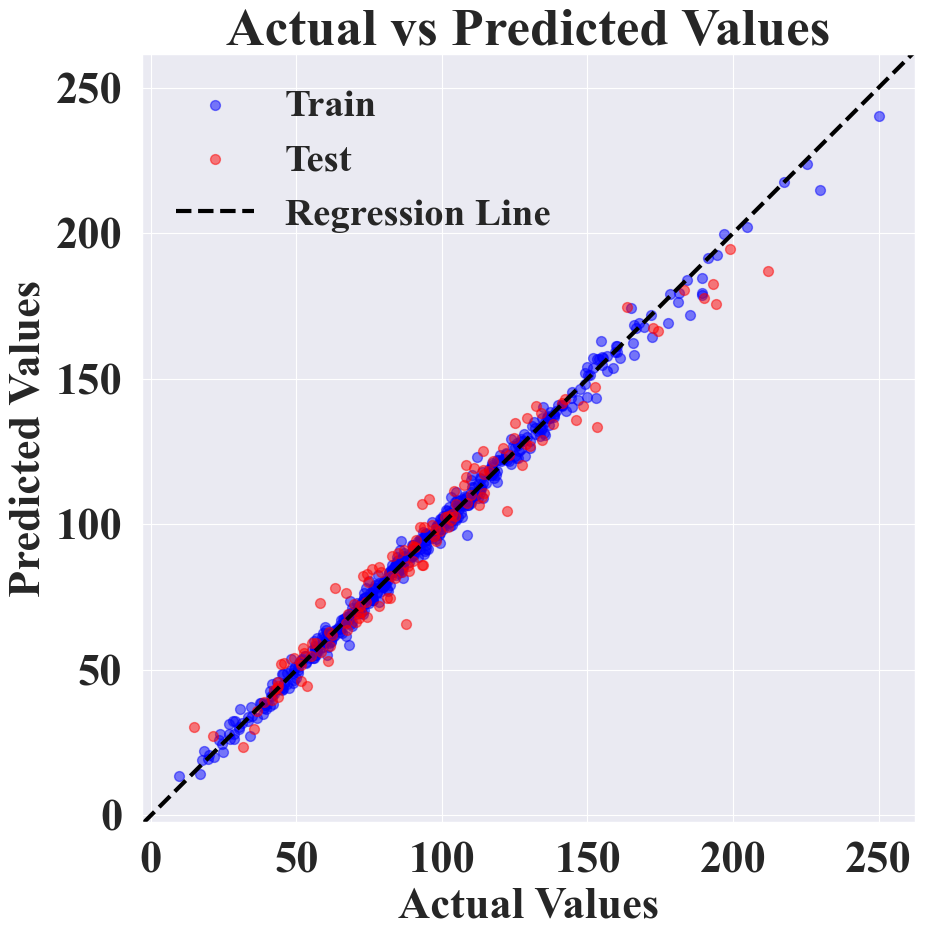

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.994633,2.051741,2.642526,2.875845,0.967404,5.349314,6.850985,7.130297


In [8]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80,
                   learning_rate=0.2,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.26,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.5,
                   random_state=21)
xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/XGB_reduced.png')

xgb_metrics

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9843.4502 - mae: 91.2634 - val_loss: 11070.2529 - val_mae: 96.9635
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9400.8486 - mae: 89.4076 - val_loss: 10552.7275 - val_mae: 94.1366
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9626.8252 - mae: 89.1543 - val_loss: 8324.0225 - val_mae: 81.1475
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6458.5503 - mae: 69.5520 - val_loss: 3218.4790 - val_mae: 44.6401
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2282.4512 - mae: 37.5858 - val_loss: 2366.1541 - val_mae: 36.5927
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1897.7063 - mae: 32.8054 - val_loss: 2191.0784 - val_mae: 35.3827
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1440.3971 - mae: 29.0133 - val_loss: 1965.5485 - val_mae: 33.2928
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1367.2695 - mae: 27.7312 - val_loss: 1789.4720 - val_ma

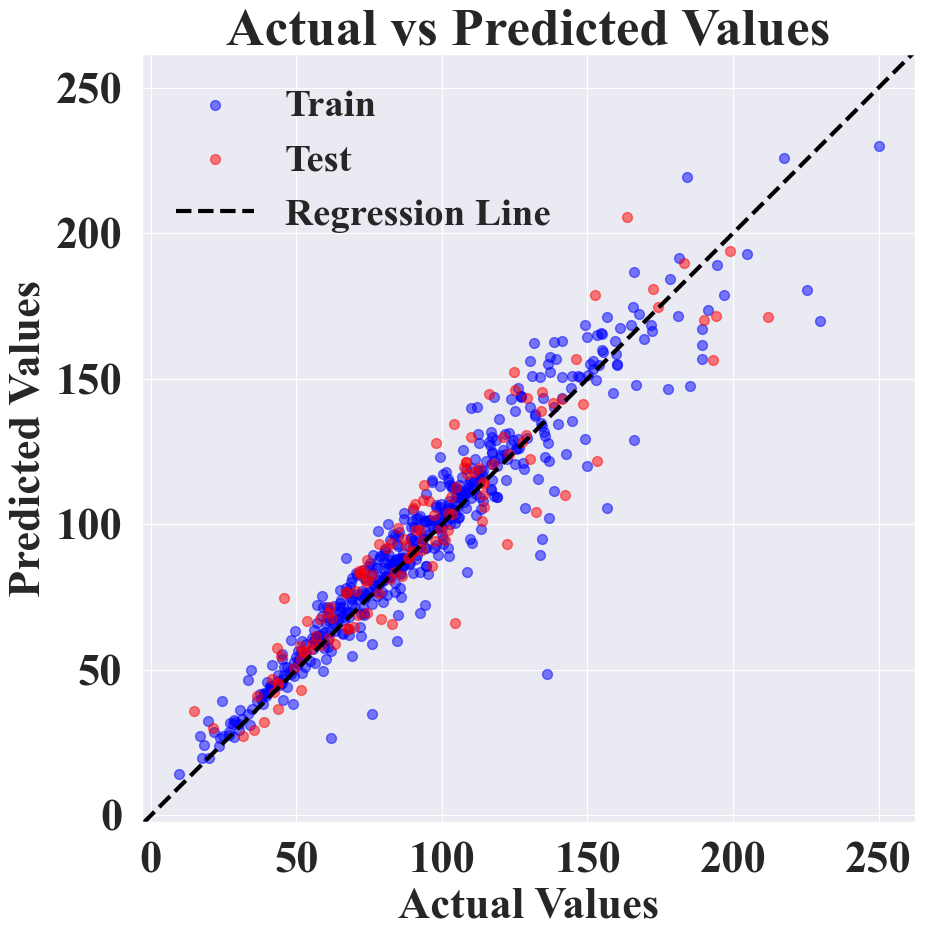

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,ANN,0.907352,8.03844,9.060841,11.94835,0.878558,9.964627,11.966122,13.76281


In [9]:
from keras import Input
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# 编译模型，指定优化器、损失函数和评价指标
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 初始化早停回调
early_stopper = EarlyStopping(
    monitor='val_loss',     # 监控验证集损失
    min_delta=0.001,        # 表示监控指标至少需要改善 0.001
    patience=50,            # 如果30个epoch内验证集损失没有改善，则提前停止训练
    verbose=1,              # 输出早停信息
    mode='min',             # 监控的指标是损失，应该减小
    restore_best_weights=True  # 训练结束后，模型权重回滚到最佳状态
)

# 训练模型
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.3,  # 使用20%的数据作为验证集
    epochs=1000,  # 最大训练轮数
    callbacks=[early_stopper],  # 使用早停机制
    verbose=1  # 输出训练信息
)
# 预测训练集和测试集
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

ann_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'ANN')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/ann_reduced.png')

ann_metrics

In [10]:
metrics = pd.concat([lr_metrics, svr_metrics, rfr_metrics, gbr_metrics, xgb_metrics, ann_metrics])
metrics.to_markdown('output/report/report_models_reduced.md', index=False, tablefmt='github')
metrics

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.368366,23.531420,34.331034,31.197682,0.452770,22.477543,32.641922,29.215163
0,SVR,0.907250,6.086613,5.642222,11.954914,0.868283,9.288821,11.029474,14.333248
0,Randon Forest,0.980705,3.625796,4.760953,5.452702,0.911245,7.856233,10.296883,11.765769
0,GBR,0.997963,1.265646,1.583380,1.771753,0.964033,5.009957,6.061530,7.489926
0,XGBoost,0.994633,2.051741,2.642526,2.875845,0.967404,5.349314,6.850985,7.130297
0,ANN,0.907352,8.038440,9.060841,11.948350,0.878558,9.964627,11.966122,13.762810
